# Willkommen zum Tutorial zur Schwingungsanalyse!

In diesem Notebook lernen wir Python-Bibliotheken kennen, wie man sie benutzt und wie man mit Daten unter Verwendung der Bibliotheken `pandas`, `numpy` und `matplotlib` arbeitet.

## Was ist eine Python-Bibliothek?

Eine Python-Bibliothek ist eine Sammlung von vorab geschriebenem Code, den Sie zur Durchführung gängiger Aufgaben verwenden können. Stellen Sie es sich wie einen Werkzeugkasten vor. Wenn Sie einen Hammer benötigen, bauen Sie nicht jedes Mal einen von Grund auf neu, sondern nehmen einen aus Ihrem Werkzeugkasten.

Bibliotheken sind nützlich, weil sie Ihnen Zeit und Mühe sparen. Sie werden von anderen Entwicklern geschrieben und sind oft für Leistung und Zuverlässigkeit optimiert. In der Datenwissenschaft sind Bibliotheken wie `pandas`, `numpy` und `matplotlib` unverzichtbare Werkzeuge.

### Wie man eine Bibliothek mit `pip` installiert

Bevor Sie eine Bibliothek verwenden können, müssen Sie sie in Ihrer Python-Umgebung installieren. Das gebräuchlichste Werkzeug dafür ist `pip`, der Paket-Installer für Python.

Sie führen `pip`-Befehle in Ihrem Terminal oder Ihrer Kommandozeile aus, nicht im Python-Notebook selbst. Das Ausrufezeichen `!` am Anfang einer Zeile in einer Notebook-Zelle weist das Notebook an, die Zeile als Shell-Befehl auszuführen.

**Um die für dieses Tutorial benötigten Bibliotheken zu installieren, führen Sie den folgenden Befehl in Ihrem Terminal aus:**
```
pip install pandas numpy matplotlib scikit-learn
```
Oder Sie können die Zelle unten ausführen.

In [1]:
!pip install pandas numpy matplotlib scikit-learn

### Wie man eine Bibliothek verwendet

Sobald eine Bibliothek installiert ist, müssen Sie sie in Ihr Notebook **importieren**, um ihre Funktionen zu nutzen. Die `import`-Anweisung macht den Code aus der Bibliothek verfügbar.

Es ist üblich, der Bibliothek einen kürzeren Alias (einen Spitznamen) zu geben, um Ihren Code sauberer und einfacher zu tippen. Zum Beispiel importieren wir `pandas` als `pd` und `numpy` als `np`.

In [2]:
# Beispiel für den Import von Bibliotheken
import pandas as pd
import numpy as np

print("Bibliotheken erfolgreich importiert!")

Bibliotheken erfolgreich importiert!


## Daten lesen und inspizieren mit `pandas`

`pandas` ist eine leistungsstarke Bibliothek zur Datenmanipulation und -analyse. Eine ihrer häufigsten Anwendungen ist das Lesen von Daten aus Dateien, wie z.B. CSV-Dateien (Comma-Separated Values).

Wenn Sie eine CSV-Datei mit `pandas` lesen, werden die Daten in einem **DataFrame** gespeichert. Ein DataFrame ist eine 2-dimensionale, beschriftete Datenstruktur mit Spalten von potenziell unterschiedlichen Typen. Sie können es sich wie eine Tabelle oder eine SQL-Tabelle vorstellen.

### Beispiel: Eine CSV-Datei lesen

Wir werden die Datei `vibration_messung_2025-10-15_1704-1737.csv` lesen. Diese Datei enthält Schwingungsdaten mit den Spalten: `time`, `sensor_id` und `wert`.

Dazu verwenden wir die Funktion `pd.read_csv()`. Wir müssen ihr nur den Pfad zur Datei geben.

In [3]:
# Definieren Sie den Pfad zur CSV-Datei
file_path = 'vibration_messung_2025-10-15_1704-1737.csv'

# Lesen Sie die CSV-Datei in einen Pandas-DataFrame
df = pd.read_csv(file_path)

# Zeigen Sie die ersten 5 Zeilen des DataFrames an
df.head()

,time,sensor_id,wert
0,2025-10-15 17:04:00.004+02,AnalogValue,67
1,2025-10-15 17:04:00.024+02,AnalogValue,0
2,2025-10-15 17:04:00.034+02,AnalogValue,0
3,2025-10-15 17:04:00.044+02,AnalogValue,0
4,2025-10-15 17:04:00.054+02,AnalogValue,0


### Beispiel: DataFrame-Infos abrufen

Die `.info()`-Methode ist eine großartige Möglichkeit, eine schnelle Zusammenfassung des DataFrames zu erhalten. Sie zeigt die Anzahl der Einträge, die Spaltennamen, die Anzahl der Nicht-Null-Werte und den Datentyp jeder Spalte.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160866 entries, 0 to 160865
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   time       160866 non-null  object
 1   sensor_id  160866 non-null  object
 2   wert       160866 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


### Beispiel: Die letzten Zeilen anzeigen

So wie `.head()` Ihnen die ersten paar Zeilen anzeigt, zeigt Ihnen die `.tail()`-Methode die letzten paar Zeilen.

In [5]:
df.tail(10)

,time,sensor_id,wert
160856,2025-10-15 17:36:59.894+02,AnalogValue,0
160857,2025-10-15 17:36:59.914+02,AnalogValue,109
160858,2025-10-15 17:36:59.924+02,AnalogValue,68
160859,2025-10-15 17:36:59.934+02,AnalogValue,126
160860,2025-10-15 17:36:59.944+02,AnalogValue,0
160861,2025-10-15 17:36:59.954+02,AnalogValue,0
160862,2025-10-15 17:36:59.964+02,AnalogValue,56
160863,2025-10-15 17:36:59.974+02,AnalogValue,61
160864,2025-10-15 17:36:59.984+02,AnalogValue,28
160865,2025-10-15 17:36:59.994+02,AnalogValue,16


## Numerische Analyse mit `numpy`

`numpy` ist die grundlegende Bibliothek für numerisches Rechnen in Python. Es bietet ein hochleistungsfähiges mehrdimensionales Array-Objekt und Werkzeuge für die Arbeit mit diesen Arrays.


### Beispiel: Vom `pandas` DataFrame zum `numpy` Array

Sie können die Daten aus einer `pandas`-DataFrame-Spalte leicht entnehmen und als `numpy`-Array bearbeiten. Nehmen wir die Spalte `wert` aus unserem DataFrame und konvertieren sie in ein `numpy`-Array.

In [6]:
# Holen Sie sich die 'wert'-Spalte als Numpy-Array
vibration_values = df['wert'].values

print(f"Der Datentyp unseres Arrays ist: {vibration_values.dtype}")
print(f"Die Form unseres Arrays ist: {vibration_values.shape}")

Der Datentyp unseres Arrays ist: int64
Die Form unseres Arrays ist: (160866,)


### Beispiel: Berechnung grundlegender Statistiken

`numpy` kann verwendet werden, um schnell Statistiken für ein Array zu berechnen. Gängige Funktionen sind `np.mean()`, `np.max()` und `np.min()`.

In [7]:
mean_vibration = np.mean(vibration_values)
max_vibration = np.max(vibration_values)
min_vibration = np.min(vibration_values)

print(f"Mittlere Schwingung: {mean_vibration:.2f}")
print(f"Maximale Schwingung: {max_vibration}")
print(f"Minimale Schwingung: {min_vibration}")

Mittlere Schwingung: 87.48
Maximale Schwingung: 3929
Minimale Schwingung: 0


## Datenverarbeitung mit Pandas

Die Datenverarbeitung ist das Herzstück der Datenwissenschaft. Gängige Operationen umfassen Filtern, Gruppieren, Bereinigen, Transformieren und Sortieren.

### Beispiel 1: Daten filtern

Wir können Zeilen aus dem DataFrame basierend auf Bedingungen auswählen. Suchen wir zum Beispiel alle Fälle, in denen der Schwingungswert `wert` größer als 2000 war.

In [8]:
high_vibration_df = df[df['wert'] > 2000]

print(f"{len(high_vibration_df)} Instanzen mit hoher Schwingung (> 2000) gefunden.")
high_vibration_df.head()

88 Instanzen mit hoher Schwingung (> 2000) gefunden.


,time,sensor_id,wert
2647,2025-10-15 17:04:29.124+02,AnalogValue,2031
2648,2025-10-15 17:04:29.134+02,AnalogValue,2011
2649,2025-10-15 17:04:29.144+02,AnalogValue,2042
2652,2025-10-15 17:04:29.184+02,AnalogValue,2075
2653,2025-10-15 17:04:29.194+02,AnalogValue,2081


### Beispiel 2: Daten gruppieren

Dieser Datensatz hat nur eine `sensor_id`, daher ist eine Gruppierung danach nicht sehr interessant. Erstellen wir stattdessen unsere eigene Kategorie und gruppieren danach. Wir erstellen eine `vibration_level`-Spalte und berechnen dann Statistiken für jede Stufe.

In [9]:
# Transformation: Erstellen Sie eine neue Spalte für das Schwingungsniveau
df['vibration_level'] = pd.cut(df['wert'], 
                               bins=[-1, 100, 1000, 4000], 
                               labels=['Niedrig', 'Mittel', 'Hoch'])

# Gruppierung: Berechnen Sie Statistiken für jede Stufe
level_stats = df.groupby('vibration_level')['wert'].agg(['mean', 'count', 'max']).round(2)
level_stats

C:\Users\tedle\AppData\Local\Temp\ipykernel_10044\303975662.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  level_stats = df.groupby('vibration_level')['wert'].agg(['mean', 'count', 'max']).round(2)


,mean,count,max
vibration_level,,,
Niedrig,24.89,112793,100
Mittel,203.49,46743,1000
Hoch,1318.14,1330,3929


### Beispiel 3: Daten sortieren

Wir können den DataFrame nach einer oder mehreren Spalten sortieren. Finden wir die 5 höchsten Schwingungsmesswerte.

In [10]:
top_5_vibrations = df.sort_values(by='wert', ascending=False).head(5)
top_5_vibrations

,time,sensor_id,wert,vibration_level
2719,2025-10-15 17:04:29.914+02,AnalogValue,3929,Hoch
2721,2025-10-15 17:04:29.944+02,AnalogValue,3907,Hoch
2716,2025-10-15 17:04:29.884+02,AnalogValue,3832,Hoch
2715,2025-10-15 17:04:29.874+02,AnalogValue,3826,Hoch
2720,2025-10-15 17:04:29.924+02,AnalogValue,3814,Hoch


## Datenvisualisierung mit `matplotlib`

Die Datenvisualisierung ist entscheidend für das Verständnis Ihrer Daten. Sie ermöglicht es Ihnen, Muster, Trends und Ausreißer zu erkennen, die Sie beim bloßen Betrachten der Rohzahlen möglicherweise übersehen. `matplotlib` ist die am weitesten verbreitete Plot-Bibliothek in Python.

### Beispiel: Den gesamten Datensatz plotten

Erstellen wir ein einfaches Liniendiagramm, um den gesamten Schwingungswert `wert` im Zeitverlauf zu visualisieren.

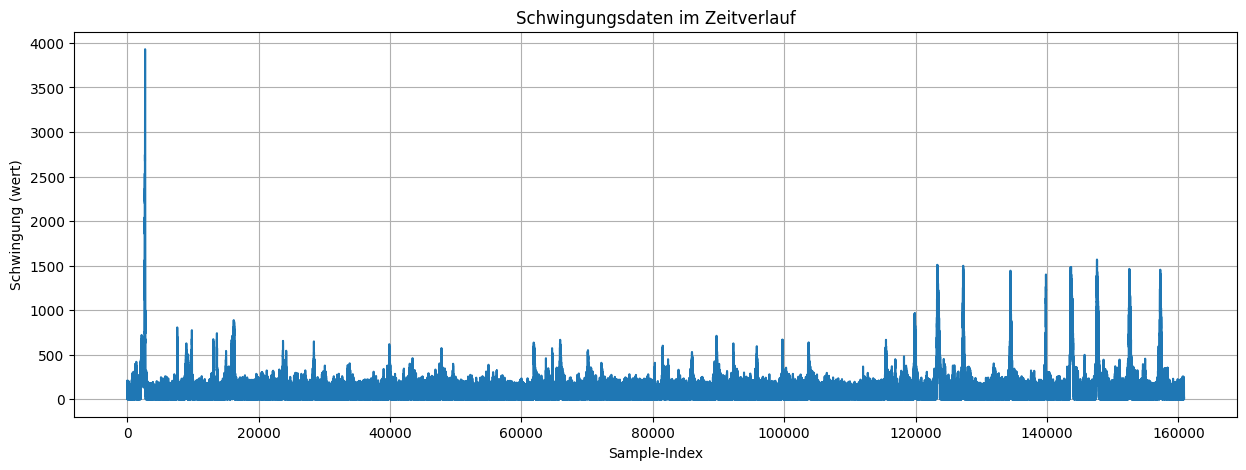

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

df['wert'].plot(figsize=(15, 5), title='Schwingungsdaten im Zeitverlauf', xlabel='Sample-Index', ylabel='Schwingung (wert)')
plt.grid(True)
plt.show()

### Analyse des Plots

Beim Betrachten des Plots können wir einige interessante Merkmale erkennen:
*   **Ein anfänglicher Spike:** Es gibt einen sehr großen, einzelnen Spike am Anfang der Daten.
*   **Grundrauschen:** Die meiste Zeit bleibt die Schwingung in einem relativ niedrigen und konstanten Bereich.
*   **Periodische Bursts:** Gegen Ende der Daten gibt es wiederholte Bursts hochfrequenter Schwingungen.

Zoomen wir auf diesen letzten Abschnitt.

### Beispiel: Einen Abschnitt ausschneiden und plotten

Das Ausschneiden von Daten ist eine gängige Operation. Wir können einen Teil des DataFrames basierend auf seinem Index auswählen und nur diesen Abschnitt plotten, um einen genaueren Blick darauf zu werfen.

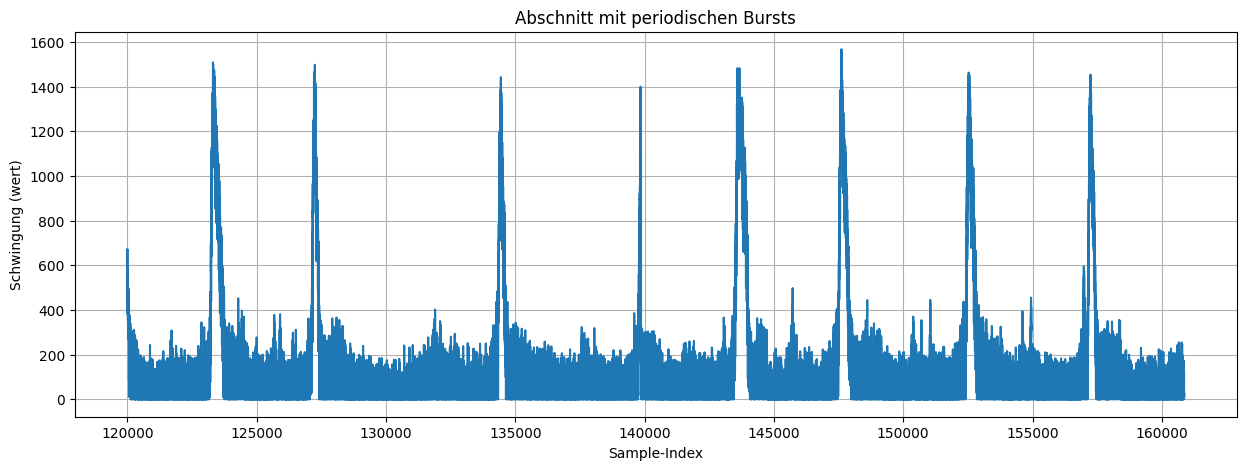

In [12]:
# Erstellen Sie einen neuen DataFrame, der Daten ab Index 120.000 enthält
periodic_bursts_df = df[120000:]

# Plotten Sie den neuen DataFrame
periodic_bursts_df['wert'].plot(figsize=(15, 5), title='Abschnitt mit periodischen Bursts', xlabel='Sample-Index', ylabel='Schwingung (wert)')
plt.grid(True)
plt.show()

### Beispiel: Speichern der geänderten Daten

Nach der Verarbeitung oder Änderung Ihrer Daten möchten Sie das Ergebnis möglicherweise in einer neuen Datei speichern. `pandas` macht dies mit der `.to_csv()`-Methode einfach.

Speichern wir unseren `periodic_bursts_df` DataFrame in einer neuen CSV-Datei. Wir setzen `index=False`, da wir den Index des DataFrames nicht als Spalte in der CSV-Datei speichern müssen.

In [13]:
# Definieren Sie den Ausgabedateipfad
output_file_path = 'periodic_bursts.csv'

# Speichern Sie den DataFrame in einer neuen CSV-Datei
periodic_bursts_df.to_csv(output_file_path, index=False)

print(f"DataFrame gespeichert unter {output_file_path}")

DataFrame gespeichert unter periodic_bursts.csv


## Abschlussübung: Analyse des kalifornischen Wohnungsdatensatzes

Jetzt ist es an der Zeit, Ihre Fähigkeiten an einem neuen Datensatz zu testen! Wir verwenden den kalifornischen Wohnungsdatensatz, einen klassischen Datensatz für Regressionsaufgaben, der in der `scikit-learn`-Bibliothek verfügbar ist.

In [14]:
from sklearn.datasets import fetch_california_housing

# Laden Sie den Datensatz
housing = fetch_california_housing(as_frame=True)
housing_df = housing.frame

print("Kalifornischer Wohnungsdatensatz erfolgreich geladen!")
housing_df.head()

Kalifornischer Wohnungsdatensatz erfolgreich geladen!


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Ihre Aufgaben:

Dieser Datensatz enthält Informationen über Wohnbezirke in Kalifornien. Ihr Ziel ist es, ihn zu untersuchen.

**Merkmale:**
*   `MedInc`: Medianeinkommen im Block
*   `HouseAge`: Medianes Hausalter im Block
*   `AveRooms`: Durchschnittliche Anzahl der Zimmer
*   `AveBedrms`: Durchschnittliche Anzahl der Schlafzimmer
*   `Population`: Blockbevölkerung
*   `AveOccup`: Durchschnittliche Hausbelegung
*   `Latitude`: Breitengrad des Hausblocks
*   `Longitude`: Längengrad des Hausblocks
*   `MedHouseVal`: Medianer Hauswert für kalifornische Bezirke (in 100.000 $)

**Aufgabe 1:** Was ist der durchschnittliche (mittlere) `MedHouseVal` (Medianer Hauswert) für alle Bezirke?

In [15]:
# Ihr Code hier

**Aufgabe 2:** Filtern Sie den DataFrame, um nur die Bezirke anzuzeigen, in denen das `HouseAge` größer als 50 Jahre ist. Wie viele solcher Bezirke gibt es?

In [ ]:
# Ihr Code hier

**Aufgabe 3:** Erstellen Sie eine neue Spalte namens `RoomsPerPerson`, indem Sie die Spalte `AveRooms` durch die Spalte `AveOccup` dividieren.

In [ ]:
# Ihr Code hier

**Aufgabe 4 (Herausforderung):** Erstellen Sie ein Streudiagramm, um die Beziehung zwischen `MedInc` (Medianeinkommen) auf der x-Achse und `MedHouseVal` (Medianer Hauswert) auf der y-Achse zu visualisieren. Geben Sie dem Diagramm einen Titel und Beschriftungen.

In [ ]:
# Ihr Code hier. Hinweis: plt.scatter(x_data, y_data)